# Практическая работа №1: Моделирование стандартных дискретных систем

Выполнили студентки гр. 0382 Михайлова Оксана и Охотникова Галина. Вариант №12.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

__Дискретный сигнал__ — это сигнал, дискретный по времени и непрерывный по состоянию.

__Аналоговый сигнал__ — это сигнал, непрерывный по времени и состоянию.

__Цифровой сигнал__ — это сигнал, дискретный и по времени, и по состоянию.

__Единичный цифровой импульс__: 

$\delta_d (k) = \begin{cases}
   1, k = 0\\
   0, k \neq 0
 \end{cases}, \enspace k = ..., -2, -1, 0, 1, 2, ...$

Является дискретным аналогом дельта-функции (функции Дирака):

$\delta (t) = \begin{cases}
   \infty, t = 0\\
   0, t \neq 0
 \end{cases}, \enspace \int_{-\infty}^{\infty} \delta(t)dt = 1$

__Дискретный единичный скачок__: 

$\sigma_d (k) = \begin{cases}
   1, k \geq 0\\
   0, k < 0
 \end{cases}, \enspace k = ..., -2, -1, 0, 1, 2, ...$

Является дискретным аналогом функции единичного скачка (функция Хэвисайда):

$\sigma (t) = \begin{cases}
   1, t > 0\\
   0,5 \enspace или \enspace неопределена, t = 0\\
   0, t < 0
 \end{cases}$

__Дискретная экспоненциальная функция__: $s(k) = \begin{cases}
   0, k < 0\\
   a^k, k \geq 0
 \end{cases}$

__Дискретная затухающая синусоида__: $ s(k) = a^kcos(k\omega+\phi)$

__Дискретный комплексный гармонический сигнал__: $ s_2(k) = C\exp(j\hat{\omega}_0k) $

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

1. Смоделировать единичный цифровой импульс $ \delta_d(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N - 1)T] $ и дискретного нормированного времени $n \in [0, N - 1] $. Пояснить:

    a. взаимосвязь между дискретным и дискретным нормированным временем;

    b. различие между единичным цифровым импульсом и дельта-функцией.

2. Смоделировать дискретный единичный скачок $ \sigma_d(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N - 1)T] $ и дискретного нормированного времени $ n \in [0, N - 1] $. Пояснить:

    a. соответствие между дискретным и аналоговым единичными скачками;

    b. чему равна частота дискретизации дискретного единичного скачка.

3. Смоделировать дискретную экспоненциальную функцию $ s_1(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N - 1)T] $ и дискретного нормированного времени $ n \in [0, N - 1] $. Пояснить соответствие между дискретной и аналоговой экспонентами.

4. Смоделировать дискретный комплексный гармонический сигнал $ s_2(k) = C\exp(j\hat{\omega}_0k) $ с выводом графиков вещественной и мнимой частей на интервале времени $ n \in [0, N - 1] $. Записать данный сигнал в виде комбинации двух вещественных последовательностей.

5. Вывести графики последовательностей $ \delta_d(k) $, $ \sigma_d(k) $ и $ s_1(k) $, задержанных на $ m $ отсчетов, на интервале времени $ n \in [0, N - 1] $. Записать формулы задержанных последовательностей.

## Выполнение работы

__Начальные данные__

Номер бригады: $ N_{бр} = 12 $

Длина последовательности: $ N = 30 + N_{бр}\bmod 5 = 32 $

Период дискретизации: $ T = 0.0005(1 + N_{бр} \bmod 3) = 0.0005 $

Основание экспоненты: $ a = (-1)^{N_{бр}}(0.8 + 0.005(N_{бр} \bmod 20)) = 0.86$

Амплитуда гармонического сигнала: $ C = 1 + N_{бр} \bmod 5 = 3$

Частота гармонического сигнала: $ \hat{\omega}_0 = \pi/(6 + N_{бр} \bmod 5) = \pi/8$ 

Задержка: $ m = 5 + N_{бр} \bmod 5 = 7$

In [36]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 12
N = 30 + 12 % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi/(6 + Nb % 5)
m = 5 + Nb % 5

### Пункт 1.

Был смоделирован единичный цифровой импульс $ \delta_d(k) $ на интервале дискретного времени $ nT \in [0, (N - 1)T] $ и дискретного нормированного времени $n \in [0, N - 1]$. На основе полученных значений были построены графики зависимостей от времени.

Взаимосвязь между дискретным и дискретным нормированным временем: дискретное нормированное время n – это дискретное время nT с периодом дискретизации T=1.

Различие между единичным цифровым импульсом и дельта-функцией: различие выражается в том, что дельта-функция в точке 0 равна бесконечности, а единичный цифровой импульс - 1.

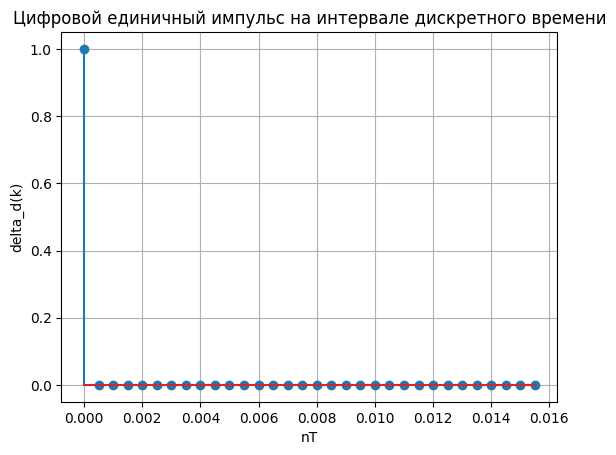

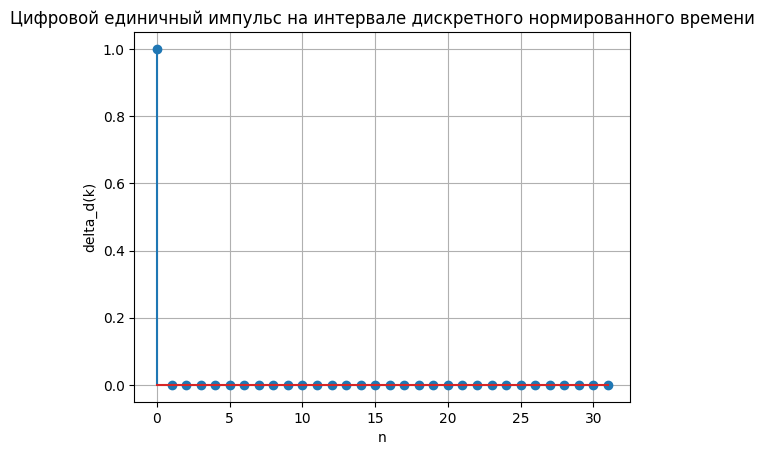

In [37]:
# единичный цифровой импульс
def delta_d(k):
    arr = [1 if i == 0 else 0 for i in k]
    return arr
    
# задание интервалов
n = np.arange(N)
nT = np.arange(0, N*T, T)

# построение графиков
plt.stem(nT, delta_d(nT))
plt.title('Цифровой единичный импульс на интервале дискретного времени')
plt.xlabel('nT')
plt.ylabel('delta_d(k)')
plt.grid()
plt.show()

plt.stem(n, delta_d(n))
plt.title('Цифровой единичный импульс на интервале дискретного нормированного времени')
plt.xlabel('n')
plt.ylabel('delta_d(k)')
plt.grid()
plt.show()


### Пункт 2.

Был смоделирован дискретный единичный скачок $ \sigma_d(k) $ на интервале дискретного времени $ nT \in [0, (N - 1)T] $ и дискретного нормированного времени $ n \in [0, N - 1] $. На основе полученных значений были построены графики зависимостей от времени.

Соответствие между дискретным и аналоговым единичными скачками: дискретная функция единичного скачка в точке 0 равна 1 и определена на множестве целых чисел.  
Аналоговая фукнция единичного скачка равна 0.5 или неопределена. Область определения: множество действительных чисел. 

Чему равна частота дискретизации дискретного единичного скачка: $f_d = \frac{1}{T}$

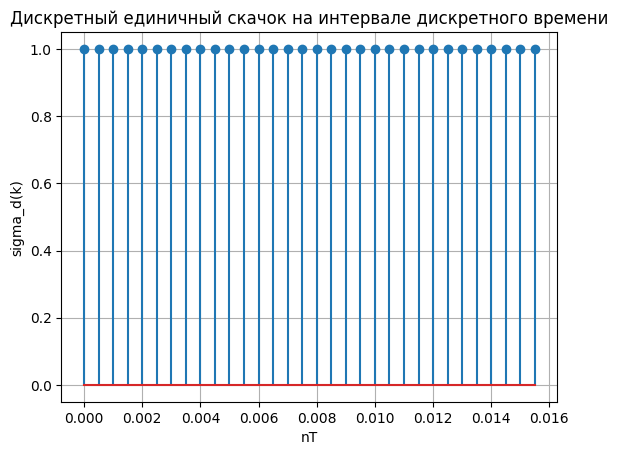

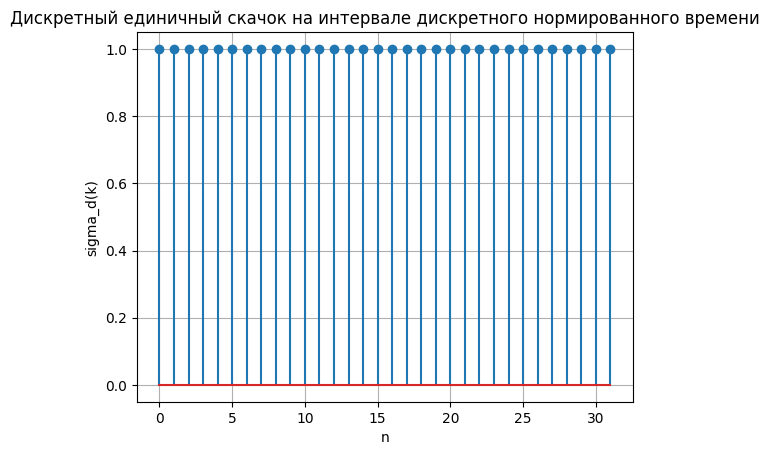

In [38]:
# дискретный единичный скачок
def sigma_d(k):
    arr = [1 if i >= 0 else 0 for i in k]
    return arr

# построение графиков
plt.stem(nT, sigma_d(nT))
plt.title('Дискретный единичный скачок на интервале дискретного времени')
plt.xlabel('nT')
plt.ylabel('sigma_d(k)')
plt.grid()
plt.show()

plt.stem(n, sigma_d(n))
plt.title('Дискретный единичный скачок на интервале дискретного нормированного времени')
plt.xlabel('n')
plt.ylabel('sigma_d(k)')
plt.grid()
plt.show()


### Пункт 3.

Была смоделирована дискретная экспоненциальная функция $ s_1(k) $ на интервале дискретного времени $ nT \in [0, (N - 1)T] $ и дискретного нормированного времени $ n \in [0, N - 1] $. На основе полученных значений были построены графики зависимостей от времени.

Соответствие между дискретной и аналоговой экспонентами: отличие заключется в том, что при значениях $k < 0$ аналоговая функция имеет значения $a^k$, а дискретная функция - нулевые.

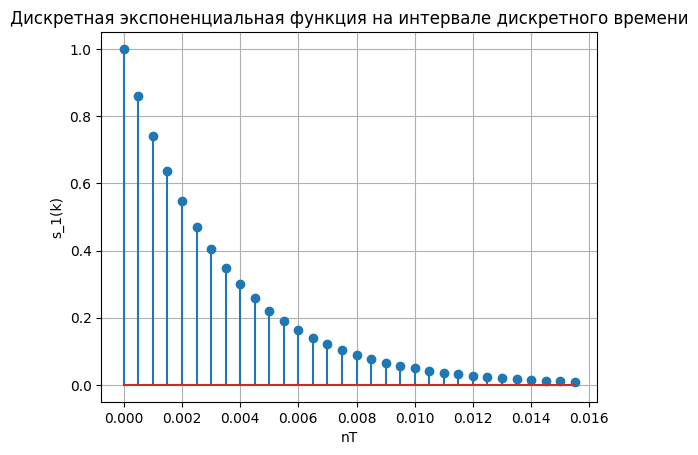

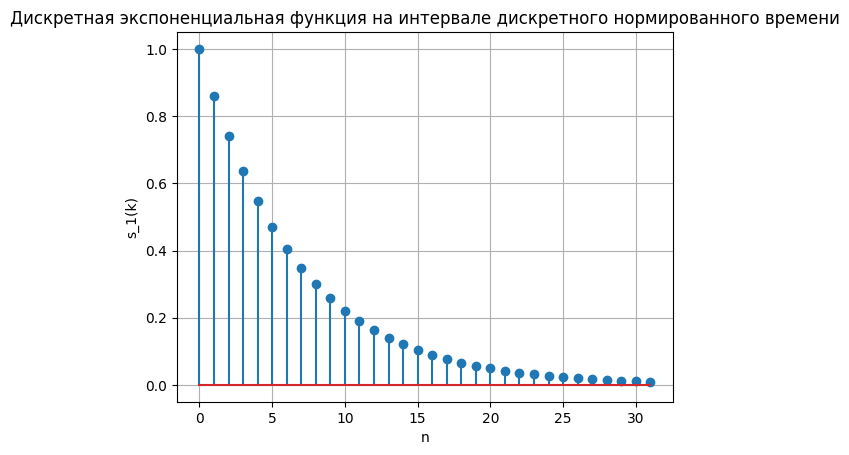

In [39]:
# дискретная экспоненциальная функция
def s_1(k):
    arr = [a**i if i >= 0 else 0 for i in k]
    return arr

# построение графиков
plt.stem(nT, s_1(n))
plt.title('Дискретная экспоненциальная функция на интервале дискретного времени')
plt.xlabel('nT')
plt.ylabel('s_1(k)')
plt.grid()
plt.show()

plt.stem(n, s_1(n))
plt.title('Дискретная экспоненциальная функция на интервале дискретного нормированного времени')
plt.xlabel('n')
plt.ylabel('s_1(k)')
plt.grid()
plt.show()

### Пункт 4.

Был смоделирован дискретный комплексный гармонический сигнал $ s_2(k) = C\exp(j\hat{\omega}_0k) $ на интервале времени $ n \in [0, N - 1] $. Были построены графики вещественной и мнимой частей.

Сигнал в виде комбинации двух вещественных последовательностей: по формуле Эйлера $e^{±iϕ}=cos(ϕ)±isin(ϕ)$ получаем

 $s_2(k)=C\exp(j\hatω_0k) = C(cos(\hatω_0k) + jsin(\hatω_0k))$

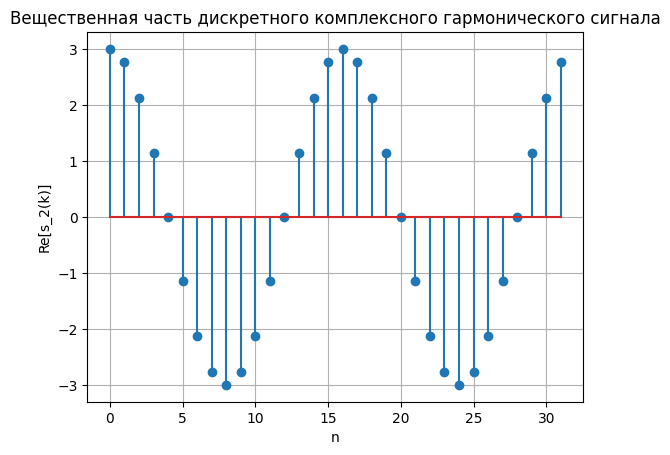

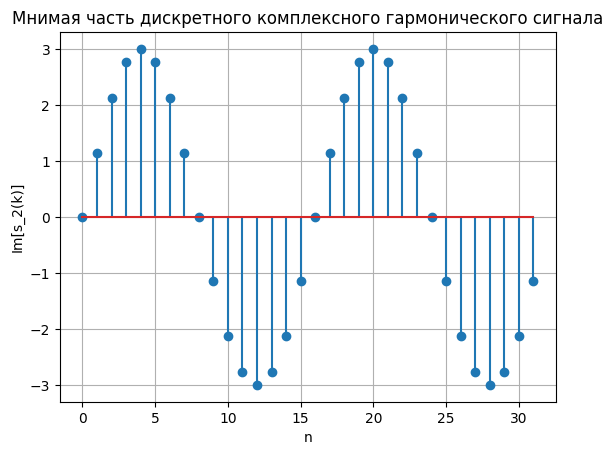

In [40]:
# дискретный комплексный гармонический сигнал
def s_2(k):
    return C*np.exp(1j*w0*k)

# построение графиков
plt.stem(n, s_2(n).real)
plt.title('Вещественная часть дискретного комплексного гармонического сигнала')
plt.xlabel('n')
plt.ylabel('Re[s_2(k)]')
plt.grid()
plt.show()

plt.stem(n, s_2(n).imag)
plt.title('Мнимая часть дискретного комплексного гармонического сигнала')
plt.xlabel('n')
plt.ylabel('Im[s_2(k)]')
plt.grid()
plt.show()

### Пункт 5.

Были построены графики последовательностей $ \delta_d(k) $, $ \sigma_d(k) $ и $ s_1(k) $, задержанных на $ m $ отсчетов, на интервале времени $ n \in [0, N - 1] $.

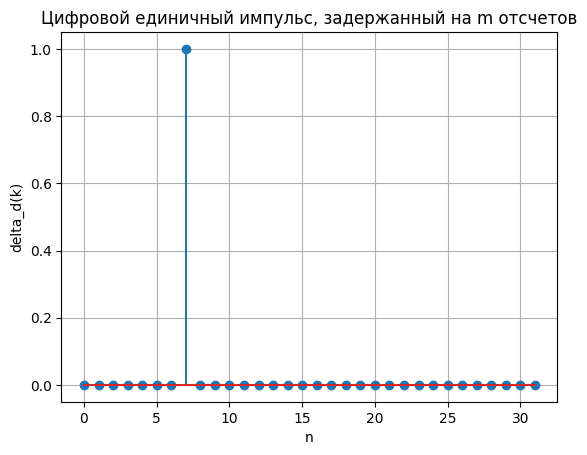

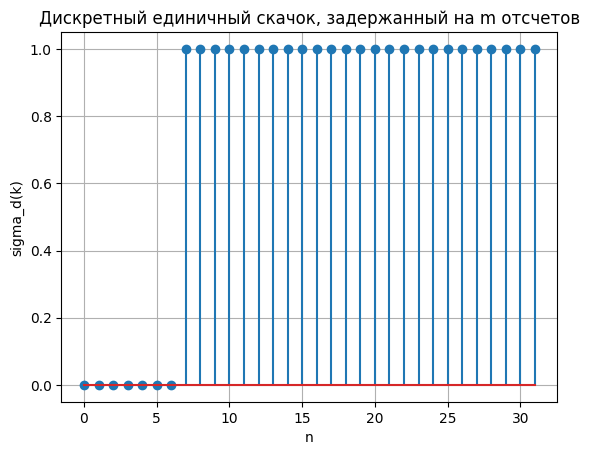

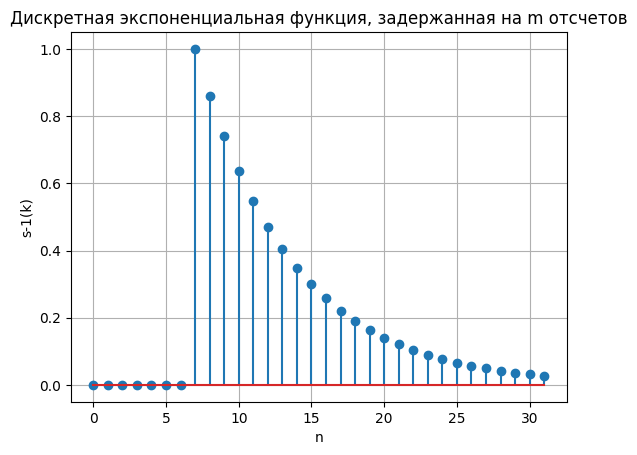

In [41]:
plt.stem(n, delta_d(n-m))
plt.title('Цифровой единичный импульс, задержанный на m отсчетов')
plt.xlabel('n')
plt.ylabel('delta_d(k)')
plt.grid()
plt.show()

plt.stem(n, sigma_d(n-m))
plt.title('Дискретный единичный скачок, задержанный на m отсчетов')
plt.xlabel('n')
plt.ylabel('sigma_d(k)')
plt.grid()
plt.show()

plt.stem(n, s_1(n-m))
plt.title('Дискретная экспоненциальная функция, задержанная на m отсчетов')
plt.xlabel('n')
plt.ylabel('s-1(k)')
plt.grid()
plt.show()

Можно заметить, что графики сдвинулись вправо. Формулы задержанных последовательностей:

$\delta_d (k-m) = \begin{cases}
  1, k = m\\
  0, k \neq 0
\end{cases}$

$\sigma_d (k-m) = \begin{cases}
  1, k \geq m\\
  0, k < m
\end{cases}$

$s_1 (k-m) = \begin{cases}
  a^{k-m}, k \geq m\\
  0, k < m
\end{cases}$

## Выводы

В результате выполнения данной работы были изучены и смоделированы единичный цифровой импульс, дискретный единичный скачок и дискретная экспоненциальная функция. Для каждого из перечисленных дискретных сигналов были построены графики на интервалах дискретного времени и  дискретного нормированного времени и проведено сравнение с соответствующими им аналоговыми сигналами. Также были построены графики и получены формулы для последовательностей данных сигналов с задержкой. Кроме того, был исследован дискретный комплексный гармонический сигнал, для которого были построены графики его вещественной и комплексной частей.